In [2]:
import os

# Specify the directory path
directory_path = 'C:\\Users\\vikic\\Desktop\\ME3+\\Python\\Carbon_price'


# Change the current working directory
os.chdir(directory_path)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [12]:
data = pd.read_excel('c:\\Users\\vikic\\Desktop\\ME3+\\Python\\Carbon_price\\Sweeden.xlsx')
print(data.head())


   Year  CO2_price  CO2_emissions
0  1991      41.22       57751216
1  1992      41.65       57578296
2  1993      41.96       57571904
3  1994      43.49       60025652
4  1995      46.13       59511812


In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['CO2_price', 'CO2_emissions']])
# Add the scaled data back to the original DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=['CO2_Emissions', 'Carbon_Price'])
scaled_data_df['Year'] = data['Year']



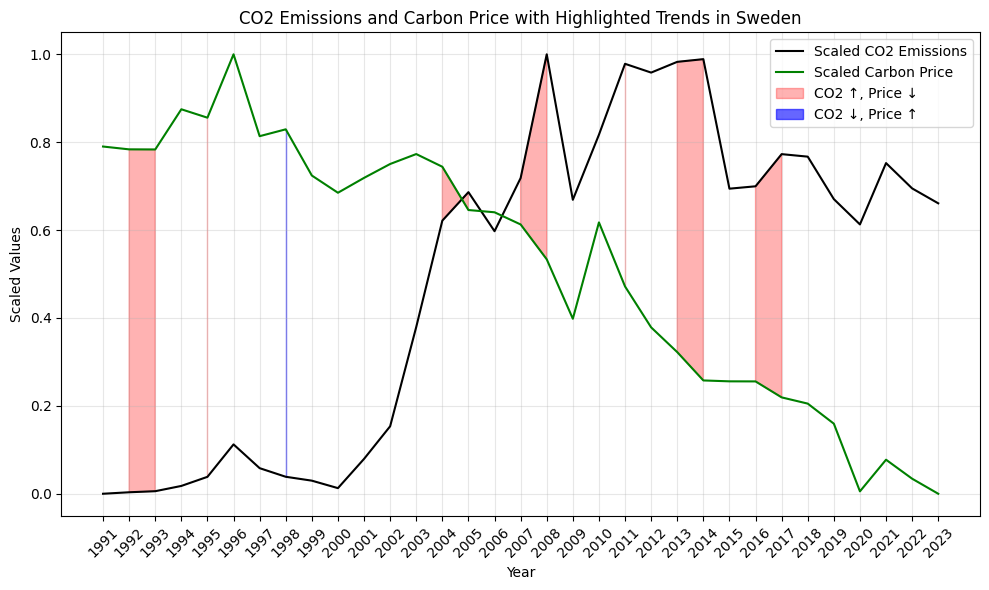

In [43]:
import matplotlib.pyplot as plt

# Define a condition where CO2 emissions are increasing and carbon price is decreasing
highlight_increase_decrease = (scaled_data_df['CO2_Emissions'].diff() > 0) & (scaled_data_df['Carbon_Price'].diff() < 0)

# Define a condition where CO2 emissions are decreasing and carbon price is increasing
highlight_decrease_increase = (scaled_data_df['CO2_Emissions'].diff() < 0) & (scaled_data_df['Carbon_Price'].diff() > 0)

plt.figure(figsize=(10, 6))

# Plot the entire line for CO2 Emissions and Carbon Price
plt.plot(scaled_data_df['Year'], scaled_data_df['CO2_Emissions'], label='Scaled CO2 Emissions', color='black')
plt.plot(scaled_data_df['Year'], scaled_data_df['Carbon_Price'], label='Scaled Carbon Price', color='green')

# Highlight regions where CO2 is increasing and price is decreasing
plt.fill_between(scaled_data_df['Year'], scaled_data_df['CO2_Emissions'], scaled_data_df['Carbon_Price'],
                 where=highlight_increase_decrease, color='red', alpha=0.3, label='CO2 ↑, Price ↓')

# Highlight regions where CO2 is decreasing and price is increasing
plt.fill_between(scaled_data_df['Year'], scaled_data_df['CO2_Emissions'], scaled_data_df['Carbon_Price'],
                 where=highlight_decrease_increase, color='blue', alpha=0.6, label='CO2 ↓, Price ↑')

# Set x-axis to show yearly intervals
plt.xticks(scaled_data_df['Year'], rotation=45)

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('CO2 Emissions and Carbon Price with Highlighted Trends in Sweden')
plt.legend()
plt.grid(True,alpha=0.3)
plt.tight_layout()  # Ensures the labels fit without overlapping
plt.show()
